In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dev_data_norm_round_spikesplit.csv')
abilities_df = pd.read_csv('abilities.csv')

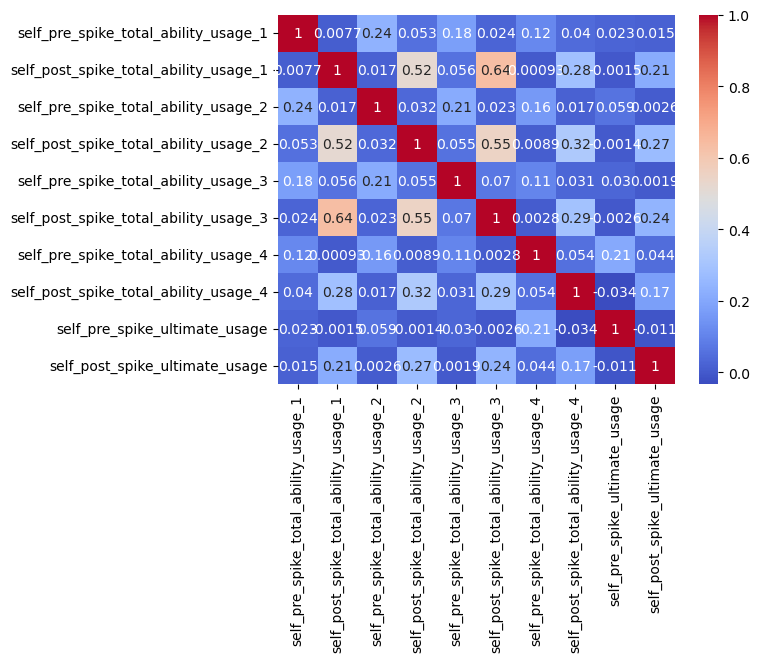

In [23]:
# checking correlation
cols = ['self_pre_spike_total_ability_usage_1', 'self_post_spike_total_ability_usage_1', 
 'self_pre_spike_total_ability_usage_2', 'self_post_spike_total_ability_usage_2',
 'self_pre_spike_total_ability_usage_3', 'self_post_spike_total_ability_usage_3',
 'self_pre_spike_total_ability_usage_4', 'self_post_spike_total_ability_usage_4',
 'self_pre_spike_ultimate_usage', 'self_post_spike_ultimate_usage']
correlation_matrix = df[cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [4]:
abilities_df

,agent_name,ability,crowd_control_general,crowd_control_mobility,crowd_control_vision,damage_for_team,damage_for_self,shield,information,healing
0,Astra,1,0,0,0,1,0,0,0,0
1,Astra,2,0,1,1,0,0,0,0,0
2,Astra,3,0,0,1,0,0,0,0,0
3,Astra,ultimate,0,0,0,0,0,1,0,0
4,Breach,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
79,Viper,ultimate,0,0,0,1,0,0,0,0
80,Yoru,1,0,0,1,0,0,0,0,0
81,Yoru,2,0,0,1,0,0,0,0,0
82,Yoru,3,0,0,0,0,0,0,1,0


In [11]:
# add these columns to df "used_*"
['pre_used_'+nn for nn in list(abilities_df.columns)[2:]]

['pre_used_crowd_control_general',
 'pre_used_crowd_control_mobility',
 'pre_used_crowd_control_vision',
 'pre_used_damage_for_team',
 'pre_used_damage_for_self',
 'pre_used_shield',
 'pre_used_information',
 'pre_used_healing']

In [ ]:
for row in df:
    
    
    row["self_character"]

In [2]:
abilities_df['agent_name'] = abilities_df['agent_name'].str.lower()
abilities_df_melted = abilities_df.melt(id_vars=['agent_name', 'ability'], 
                      value_vars=['crowd_control_general', 'crowd_control_mobility', 'crowd_control_vision', 
                                  'damage_for_team', 'damage_for_self', 'shield', 'information', 'healing'], 
                      var_name='ability_type', 
                      value_name='has_ability_type')

In [3]:
abilities_df_ability_mapping = {
    '1': ['self_pre_spike_total_ability_usage_1', 'self_post_spike_total_ability_usage_1'],
    '2': ['self_pre_spike_total_ability_usage_2', 'self_post_spike_total_ability_usage_2'],
    '3': ['self_pre_spike_total_ability_usage_3', 'self_post_spike_total_ability_usage_3'],
    '4': ['self_pre_spike_total_ability_usage_4', 'self_post_spike_total_ability_usage_4'],
    'ultimate': ['self_pre_spike_ultimate_usage', 'self_post_spike_ultimate_usage']
}

,agent_name,ability,ability_type,has_ability_type
0,astra,self_pre_spike_total_ability_usage_1,crowd_control_general,0
1,astra,self_pre_spike_total_ability_usage_1,crowd_control_general,0
2,astra,self_pre_spike_total_ability_usage_1,crowd_control_general,0
3,astra,self_pre_spike_total_ability_usage_1,crowd_control_general,0
4,breach,self_pre_spike_total_ability_usage_1,crowd_control_general,0
...,...,...,...,...
667,viper,self_post_spike_ultimate_usage,healing,0
668,yoru,self_post_spike_ultimate_usage,healing,0
669,yoru,self_post_spike_ultimate_usage,healing,0
670,yoru,self_post_spike_ultimate_usage,healing,0


In [5]:
df_copy = df.copy()
df_copy

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,self_pre_spike_total_loadout_value_loss,self_post_spike_total_loadout_value_loss,self_pre_spike_total_ability_usage_1,self_post_spike_total_ability_usage_1,self_pre_spike_total_ability_usage_2,self_post_spike_total_ability_usage_2,self_pre_spike_total_ability_usage_3,self_post_spike_total_ability_usage_3,self_pre_spike_total_ability_usage_4,self_post_spike_total_ability_usage_4
0,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,1834.0,0.0,0,0,1,0,1,0,0,0
1,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,7700.0,0.0,1,0,0,0,1,0,1,0
2,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,8350.0,3600.0,1,0,1,0,1,0,0,0
3,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,2136.0,0.0,1,0,0,0,1,0,0,0
4,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,800.0,0.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,12052.0,1600.0,1,0,3,1,2,1,0,0
8041,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,8772.0,0.0,2,0,2,0,2,0,0,0
8042,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,9160.0,0.0,2,0,1,0,1,0,0,0
8043,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,4600.0,3500.0,1,1,0,1,1,1,0,0


In [17]:
for _, row in df.iterrows():
    agent = row['self_character']
    # Initialize the list for storing column names
    cols = []
    for col in df.columns:
        if 'ability_usage' in col and row[col] == 1:
            if 'pre' in col:
                prepost = 'pre'
            elif 'post' in col:
                prepost = 'post'
            cols.append(col)
                # Get the ability number
            ab_num = int(col.split('usage_')[1])

    # Get the specific row from agent_abilities DataFrame
    agent_abilities_row = abilities_df[(abilities_df['agent_name'] == agent) & (abilities_df['ability'] == ab_num)]
    print(agent_abilities_row)
    # Print column names with a True boolean value
    for column in agent_abilities_row.columns:
        if agent_abilities_row.iloc[0][column] == True:
            print(column)
            df[prepost+column] = true

Empty DataFrame
Columns: [agent_name, ability, crowd_control_general, crowd_control_mobility, crowd_control_vision, damage_for_team, damage_for_self, shield, information, healing]
Index: []


IndexError: single positional indexer is out-of-bounds

In [7]:
merged_df = df_copy.merge(abilities_df_adjusted, how='outer', left_on='self_character', right_on='agent_name')
merged_df

KeyboardInterrupt: 

In [ ]:
df_copy1 = pd.merge(df_copy1, abilities_df_adjusted, how='left', left_on=['self_character', ability_name], right_on=['agent_name', 'ability'])




In [ ]:
for ability_name in abilities_df_ability_mapping.values():
    df_copy = pd.merge(df_copy, abilities_df_adjusted, how='left', left_on=['self_character', ability_name], right_on=['agent_name', 'ability'])

# Drop redundant columns
df_copy.drop(['agent_name', 'ability'], axis=1, inplace=True)

df_copy

In [8]:
df = pd.read_csv('dev_data_norm_round_spikesplit.csv')
df

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,self_pre_spike_total_loadout_value_loss,self_post_spike_total_loadout_value_loss,self_pre_spike_total_ability_usage_1,self_post_spike_total_ability_usage_1,self_pre_spike_total_ability_usage_2,self_post_spike_total_ability_usage_2,self_pre_spike_total_ability_usage_3,self_post_spike_total_ability_usage_3,self_pre_spike_total_ability_usage_4,self_post_spike_total_ability_usage_4
0,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,1834.0,0.0,0,0,1,0,1,0,0,0
1,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,7700.0,0.0,1,0,0,0,1,0,1,0
2,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,8350.0,3600.0,1,0,1,0,1,0,0,0
3,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,2136.0,0.0,1,0,0,0,1,0,0,0
4,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,800.0,0.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,12052.0,1600.0,1,0,3,1,2,1,0,0
8041,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,8772.0,0.0,2,0,2,0,2,0,0,0
8042,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,9160.0,0.0,2,0,1,0,1,0,0,0
8043,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,4600.0,3500.0,1,1,0,1,1,1,0,0


In [3]:
abilities_df = pd.read_csv('abilities.csv')

abilities_df

,agent_name,ability,crowd_control_general,crowd_control_mobility,crowd_control_vision,damage_for_team,damage_for_self,shield,information,healing
0,Astra,1,0,0,0,1,0,0,0,0
1,Astra,2,0,1,1,0,0,0,0,0
2,Astra,3,0,0,1,0,0,0,0,0
3,Astra,ultimate,0,0,0,0,0,1,0,0
4,Breach,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
79,Viper,ultimate,0,0,0,1,0,0,0,0
80,Yoru,1,0,0,1,0,0,0,0,0
81,Yoru,2,0,0,1,0,0,0,0,0
82,Yoru,3,0,0,0,0,0,0,1,0


In [4]:
abilities_df['agent_name'] = abilities_df['agent_name'].str.lower()
abilities_df

,agent_name,ability,crowd_control_general,crowd_control_mobility,crowd_control_vision,damage_for_team,damage_for_self,shield,information,healing
0,astra,1,0,0,0,1,0,0,0,0
1,astra,2,0,1,1,0,0,0,0,0
2,astra,3,0,0,1,0,0,0,0,0
3,astra,ultimate,0,0,0,0,0,1,0,0
4,breach,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
79,viper,ultimate,0,0,0,1,0,0,0,0
80,yoru,1,0,0,1,0,0,0,0,0
81,yoru,2,0,0,1,0,0,0,0,0
82,yoru,3,0,0,0,0,0,0,1,0


In [5]:
abilities_df_melted = abilities_df.melt(id_vars=['agent_name', 'ability'], 
                      value_vars=['crowd_control_general', 'crowd_control_mobility', 'crowd_control_vision', 
                                  'damage_for_team', 'damage_for_self', 'shield', 'information', 'healing'], 
                      var_name='ability_type', 
                      value_name='has_ability_type')
abilities_df_melted

,agent_name,ability,ability_type,has_ability_type
0,astra,1,crowd_control_general,0
1,astra,2,crowd_control_general,0
2,astra,3,crowd_control_general,0
3,astra,ultimate,crowd_control_general,0
4,breach,1,crowd_control_general,0
...,...,...,...,...
667,viper,ultimate,healing,0
668,yoru,1,healing,0
669,yoru,2,healing,0
670,yoru,3,healing,0


In [6]:
abilities_df_ability_mapping = {
    '1': ['self_pre_spike_total_ability_usage_1', 'self_post_spike_total_ability_usage_1'],
    '2': ['self_pre_spike_total_ability_usage_2', 'self_post_spike_total_ability_usage_2'],
    '3': ['self_pre_spike_total_ability_usage_3', 'self_post_spike_total_ability_usage_3'],
    '4': ['self_pre_spike_total_ability_usage_4', 'self_post_spike_total_ability_usage_4'],
    'ultimate': ['self_pre_spike_ultimate_usage', 'self_post_spike_ultimate_usage']
}

abilities_df_adjusted = pd.concat([
    abilities_df_melted.assign(ability=ability_name)
    for ability, ability_names in abilities_df_ability_mapping.items()
    for ability_name in ability_names
    if abilities_df_melted['ability'].str.contains(ability).any()
])

abilities_df_adjusted

,agent_name,ability,ability_type,has_ability_type
0,astra,self_pre_spike_total_ability_usage_1,crowd_control_general,0
1,astra,self_pre_spike_total_ability_usage_1,crowd_control_general,0
2,astra,self_pre_spike_total_ability_usage_1,crowd_control_general,0
3,astra,self_pre_spike_total_ability_usage_1,crowd_control_general,0
4,breach,self_pre_spike_total_ability_usage_1,crowd_control_general,0
...,...,...,...,...
667,viper,self_post_spike_ultimate_usage,healing,0
668,yoru,self_post_spike_ultimate_usage,healing,0
669,yoru,self_post_spike_ultimate_usage,healing,0
670,yoru,self_post_spike_ultimate_usage,healing,0


In [9]:
df_copy = df.copy()

# Merge df1 with df2_adjusted for each ability column
for ability_name in abilities_df_ability_mapping.values():
    df_copy = pd.merge(df_copy, abilities_df_adjusted, how='left', left_on=['self_character', ability_name], right_on=['agent_name', 'ability'])

# # Drop redundant columns
# df1_copy.drop(['agent_name', 'ability'], axis=1, inplace=True)

df_copy

KeyError: ['self_pre_spike_total_ability_usage_1', 'self_post_spike_total_ability_usage_1']

In [10]:
abilities_df_pre = abilities_df.copy()
abilities_df_pre['ability'] = 'self_pre_spike_total_ability_usage_' + abilities_df_pre['ability'].astype(str)
abilities_df_post = abilities_df.copy()
abilities_df_post['ability'] = 'self_post_spike_total_ability_usage_' + abilities_df_post['ability'].astype(str)

# Merge df1 with df2_pre and df2_post
df = pd.merge(df, abilities_df_pre, how='left', left_on=['self_character', 'ability'], right_on=['agent_name', 'ability'])
df = pd.merge(df, abilities_df_post, how='left', left_on=['self_character', 'ability'], right_on=['agent_name', 'ability'])

df

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,healing_x,agent_name_y,crowd_control_general_y,crowd_control_mobility_y,crowd_control_vision_y,damage_for_team_y,damage_for_self_y,shield_y,information_y,healing_y
0,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8041,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8042,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8043,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
abilities_df_post

,agent_name,ability,crowd_control_general,crowd_control_mobility,crowd_control_vision,damage_for_team,damage_for_self,shield,information,healing
0,astra,self_post_spike_total_ability_usage_1,0,0,0,1,0,0,0,0
1,astra,self_post_spike_total_ability_usage_2,0,1,1,0,0,0,0,0
2,astra,self_post_spike_total_ability_usage_3,0,0,1,0,0,0,0,0
3,astra,self_post_spike_total_ability_usage_ultimate,0,0,0,0,0,1,0,0
4,breach,self_post_spike_total_ability_usage_1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
79,viper,self_post_spike_total_ability_usage_ultimate,0,0,0,1,0,0,0,0
80,yoru,self_post_spike_total_ability_usage_1,0,0,1,0,0,0,0,0
81,yoru,self_post_spike_total_ability_usage_2,0,0,1,0,0,0,0,0
82,yoru,self_post_spike_total_ability_usage_3,0,0,0,0,0,0,1,0


In [6]:
df.columns[:100]

Index(['user_id', 'map', 'player', 'ally4_character', 'self_character',
       'ally1_character', 'ally2_character', 'ally3_character',
       'opponent5_character', 'opponent6_character', 'opponent7_character',
       'opponent8_character', 'opponent9_character', 'spike_planted',
       'spike_time', 'round_number', 'round_info_ally_side',
       'round_info_round_end', 'round_info_round_won',
       'round_info_round_start', 'ally4_pre_spike_elims',
       'ally4_post_spike_elims', 'ally4_pre_spike_deaths',
       'ally4_post_spike_deaths', 'ally4_pre_spike_assists',
       'ally4_post_spike_assists', 'ally4_pre_spike_headshots',
       'ally4_post_spike_headshots', 'ally4_pre_spike_wallbangs',
       'ally4_post_spike_wallbangs', 'ally4_pre_spike_first_bloods',
       'ally4_post_spike_first_bloods', 'self_pre_spike_elims',
       'self_post_spike_elims', 'self_pre_spike_deaths',
       'self_post_spike_deaths', 'self_pre_spike_assists',
       'self_post_spike_assists', 'self_pre_s

In [8]:
df.columns[100:200]

Index(['opponent1_pre_spike_wallbangs', 'opponent1_post_spike_wallbangs',
       'opponent1_pre_spike_first_bloods', 'opponent1_post_spike_first_bloods',
       'opponent2_pre_spike_elims', 'opponent2_post_spike_elims',
       'opponent2_pre_spike_deaths', 'opponent2_post_spike_deaths',
       'opponent2_pre_spike_assists', 'opponent2_post_spike_assists',
       'opponent2_pre_spike_headshots', 'opponent2_post_spike_headshots',
       'opponent2_pre_spike_wallbangs', 'opponent2_post_spike_wallbangs',
       'opponent2_pre_spike_first_bloods', 'opponent2_post_spike_first_bloods',
       'opponent3_pre_spike_elims', 'opponent3_post_spike_elims',
       'opponent3_pre_spike_deaths', 'opponent3_post_spike_deaths',
       'opponent3_pre_spike_assists', 'opponent3_post_spike_assists',
       'opponent3_pre_spike_headshots', 'opponent3_post_spike_headshots',
       'opponent3_pre_spike_wallbangs', 'opponent3_post_spike_wallbangs',
       'opponent3_pre_spike_first_bloods', 'opponent3_post_spi

In [9]:
df.columns[200:]

Index(['ally1_pre_spike_ultimate_usage', 'ally1_post_spike_ultimate_usage',
       'ally2_ultimate_usage', 'ally2_pre_spike_ultimate_usage',
       'ally2_post_spike_ultimate_usage', 'ally3_ultimate_usage',
       'ally3_pre_spike_ultimate_usage', 'ally3_post_spike_ultimate_usage',
       'opponent0_ultimate_usage', 'opponent0_pre_spike_ultimate_usage',
       'opponent0_post_spike_ultimate_usage', 'opponent1_ultimate_usage',
       'opponent1_pre_spike_ultimate_usage',
       'opponent1_post_spike_ultimate_usage', 'opponent2_ultimate_usage',
       'opponent2_pre_spike_ultimate_usage',
       'opponent2_post_spike_ultimate_usage', 'opponent3_ultimate_usage',
       'opponent3_pre_spike_ultimate_usage',
       'opponent3_post_spike_ultimate_usage', 'opponent4_ultimate_usage',
       'opponent4_pre_spike_ultimate_usage',
       'opponent4_post_spike_ultimate_usage', 'self_pre_spike_map_covered',
       'self_pre_spike_movement_metric', 'self_post_spike_map_covered',
       'self_post_sp

In [18]:
df_merged = pd.merge(df, abilities_df_melted, how='left', left_on=['self_character', 'ability'], right_on=['agent_name', 'ability'])
df_merged

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,self_pre_spike_total_ability_usage_2,self_post_spike_total_ability_usage_2,self_pre_spike_total_ability_usage_3,self_post_spike_total_ability_usage_3,self_pre_spike_total_ability_usage_4,self_post_spike_total_ability_usage_4,ability,agent_name,ability_type,has_ability_type
0,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,1,0,1,0,0,0,usage,NaN,NaN,NaN
1,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,0,0,1,0,1,0,usage,NaN,NaN,NaN
2,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,1,0,1,0,0,0,usage,NaN,NaN,NaN
3,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,0,0,1,0,0,0,usage,NaN,NaN,NaN
4,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,1,0,1,0,0,0,usage,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,3,1,2,1,0,0,usage,NaN,NaN,NaN
8041,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,2,0,2,0,0,0,usage,NaN,NaN,NaN
8042,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,1,0,1,0,0,0,usage,NaN,NaN,NaN
8043,1018,Lotus,2,killjoy,sage,viper,breach,yoru,fade,harbor,...,0,1,1,1,0,0,usage,NaN,NaN,NaN
